# Quick example to smooth a signal

In [1]:
%pylab inline
#import sys
sys.path.append("../")
import numpy as np
import scipy
from matplotlib import pyplot as plt
#import gcvspline
import rampy as rp
import gcvspline

Populating the interactive namespace from numpy and matplotlib


/home/charles/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Creating a fake, noisy signal

In [2]:
nb_points  = 200
x = np.linspace(50, 600, nb_points)

# gaussian peaks
p1 = 20.0 * np.exp(-np.log(2) * ((x-150.0)/15.0)**2)
p2 = 100.0 * np.exp(-np.log(2) * ((x-250.0)/20.0)**2)
p3 = 50.0 * np.exp(-np.log(2) * ((x-450.0)/50.0)**2)
p4 = 20.0 * np.exp(-np.log(2) * ((x-350.0)/300)**2)
p5 = 30.0 * np.exp(-np.log(2) * ((x-460.0)/5.0)**2)

# background: a large gaussian + linear 
bkg = 60.0 * np.exp(-np.log(2) * ((x-250.0)/200.0)**2) + 0.1*x

#noise
noise = 2.0 * np.random.normal(size=nb_points)

#observation
y = p1 + p2 + p3 + p4 + p5 + noise +bkg


# Smoothing the signal with the smooth() function

The smooth function has 10 different smnoothings algorithms.

Spline, Savitsky-Golay and Whittaker smoothing are available as:
    - GCVSmoothedNSpline (Generalised Cross Validated Spline, see gcvspline doc)
    - DOFSmoothedNSpline (Degree of Freedom spline, see gcvspline doc)
    - MSESmoothedNSpline (Mean Square Error spline, see gcvspline doc)
    - savgol, the scipy Savitsky-Golay filter
    - whittaker, a Whittaker smoother (see also whittaker() function)

Moving window smoothings are available by setting the method to:
    - flat, a flat window smoothing
    - hanning, a hanning window smoothing
    - hamming, a hamming window smoothing
    - bartlett, a bartlett window smoothing
    - blackman, a blackman window smoothing
    
See the smooth function help for more details on parameters

In [3]:
y_smo_1 = rp.smooth(x,y,method="GCVSmoothedNSpline")
y_smo_2 = rp.smooth(x,y,method="DOFSmoothedNSpline")
y_smo_3 = rp.smooth(x,y,method="MSESmoothedNSpline")
y_smo_4 = rp.smooth(x,y,method="savgol",window_length=5,polyorder=2)
y_smo_5 = rp.smooth(x,y,method="whittaker",Lambda=10**0.5)
y_smo_6 = rp.smooth(x,y,method="flat",window_length=5)
y_smo_7 = rp.smooth(x,y,method="hanning",window_length=5)
y_smo_8 = rp.smooth(x,y,method="hamming",window_length=5)
y_smo_9 = rp.smooth(x,y,method="bartlett",window_length=5)
y_smo_10 = rp.smooth(x,y,method="blackman",window_length=5)

/home/charles/miniconda3/envs/py36/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


# Figures

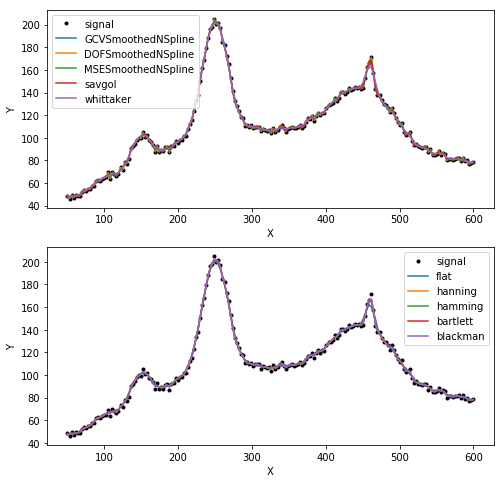

In [4]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(x,y,"k.",label="signal")
plt.plot(x,y_smo_1,label="GCVSmoothedNSpline")
plt.plot(x,y_smo_2,label="DOFSmoothedNSpline")
plt.plot(x,y_smo_3,label="MSESmoothedNSpline")
plt.plot(x,y_smo_4,label="savgol")
plt.plot(x,y_smo_5,label="whittaker")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,y,"k.",label="signal")
plt.plot(x,y_smo_6,label="flat")
plt.plot(x,y_smo_7,label="hanning")
plt.plot(x,y_smo_8,label="hamming")
plt.plot(x,y_smo_9,label="bartlett")
plt.plot(x,y_smo_10,label="blackman")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()